### 1.C INSIGHTS DISCOVERY

Importing required libraries/packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud
from collections import Counter
warnings.filterwarnings("ignore")

Importing dataset

In [2]:
df_train = pd.read_csv('processed_essays.csv')

In [3]:
def string_to_list(string):
    return string.split()

In [4]:
def nan_to_blank(val):
    if pd.isna(val) or val is None:
        return ''
    else:
        return val

In [5]:
df_train['lemmatized_text'] = df_train['lemmatized_text'].apply(string_to_list)
df_train['cleaned_tokenize_text'] = df_train['cleaned_tokenize_text'].apply(string_to_list)
df_train['corrected_text'] = df_train['corrected_text'].apply(string_to_list)
df_train['mistakes'] = df_train['mistakes'].apply(nan_to_blank)
df_train['mistakes'] = df_train['mistakes'].apply(string_to_list)

Let's try to understand how the score of essays are assigned.

In [6]:
low_df = df_train[df_train['score_category'] == 'low'].reset_index()
med_df = df_train[df_train['score_category'] == 'medium'].reset_index()
high_df = df_train[df_train['score_category'] == 'high'].reset_index()

print('Low Scored Essays Shape: ', low_df.shape)
print('Medium Scored Essays Shape: ', med_df.shape)
print('High Scored Essays Shape: ', high_df.shape)

Low Scored Essays Shape:  (567, 23)
Medium Scored Essays Shape:  (3094, 23)
High Scored Essays Shape:  (250, 23)


Basis on the criteria, if all scoring matrix are less than equal to 2.5 then essay is low-scored; if all scoring matrix are greater than equal to 4.0 then essay is high-scored; else medium-scored.

Reading a few samples of low-scored and high-scored essays to understand how grader would think to asses the quality of essays.

In [7]:
low_df['full_text'][0]

"When a problem is a change you have to let it do the best on you no matter what is happening it can change your mind. sometimes you need to wake up and look what is around you because problems are the best way to change what you want to change along time ago. A\n\nproblem is a change for you because it can make you see different and help you to understand how tings wok.\n\nFirst of all it can make you see different then the others. For example i remember that when i came to the United States i think that nothing was going to change me because i think that nothing was going to change me because everything was different that my country and then i realist that wrong because a problem may change you but sometimes can not change the way it is, but i remember that i was really shy but i think that change a lot because sometimes my problems make me think that there is more thing that i never see in my life but i just need to see it from a different way and dont let nothing happened and ruing

In [8]:
high_df['full_text'][0]

'The best time in life is when you become yourself. I agree that the greatest accomplishment, is when you be yourself in a world that constantly trying to make you something else. Because you make your own choices, you become more happy, and you respect others.\n\nFirst, you make your own choices by being yourself. Becoming yourself means that you should be able to make your own choices and not be shy or afraid of what you\'re doing. Because you\'re defining yourself by doing those things that you want. Some people follow others, therefore, they don\'t make their own choices. People are afraid to make their own choice because they don\'t want to get rejected or be wrong. In this world, most of the teenagers act and follow the people who are strong and bullies. The reason they follow them and make the same choices they make, is because they\'re afraid that they will get beaten up and be left out. Personally when I came to the United States I used to follow other, because I thought they 

As a grader, I would think the first thing to look out is the number of spelling mistakes done by the students in essay.

Let's look at the proportion of mistakes in low-scored and high-scored essays.

Minimum number of mistakes done in a low-scored essay:  0
Maximum number of mistakes done in a low-scored essay:  69
Minimum number of mistakes done in a high-scored essay:  0
Maximum number of mistakes done in a high-scored essay:  13


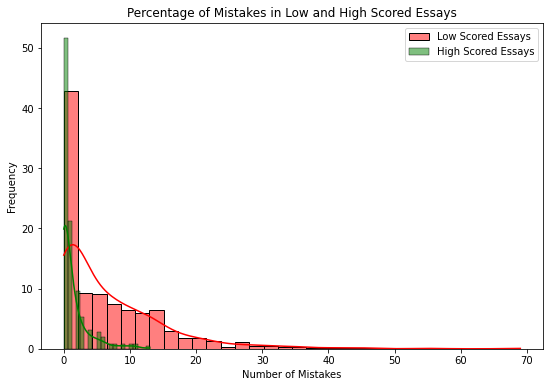

In [9]:
print('Minimum number of mistakes done in a low-scored essay: ', low_df['num_mistakes'].min())
print('Maximum number of mistakes done in a low-scored essay: ', low_df['num_mistakes'].max())
print('Minimum number of mistakes done in a high-scored essay: ', high_df['num_mistakes'].min())
print('Maximum number of mistakes done in a high-scored essay: ', high_df['num_mistakes'].max())

fig, ax = plt.subplots(figsize=(9, 6))

# Plot the histograms of num_mistakes for low_df and high_df
sns.histplot(data=low_df, x='num_mistakes', color='red', alpha=0.5, stat='percent', label='Low Scored Essays', kde=True)
sns.histplot(data=high_df, x='num_mistakes', color='green', alpha=0.5, stat='percent', label='High Scored Essays', kde=True)

# Set the chart title and axis labels
plt.title('Percentage of Mistakes in Low and High Scored Essays')
plt.xlabel('Number of Mistakes')
plt.ylabel('Frequency')

# Add a legend to the chart
plt.legend()

# Show the chart
plt.show()

Above plot signifies how essays with most spelling mistakes were scored poorly, which makes to give more score to essays with rightly spelled words.

Average number of sentences used by students in low-scored essays 13
Average number of sentences used by students in high-scored essays 25
Average sentence length written by students in low-scored essays 41
Average sentence length written by students in high-scored essays 21


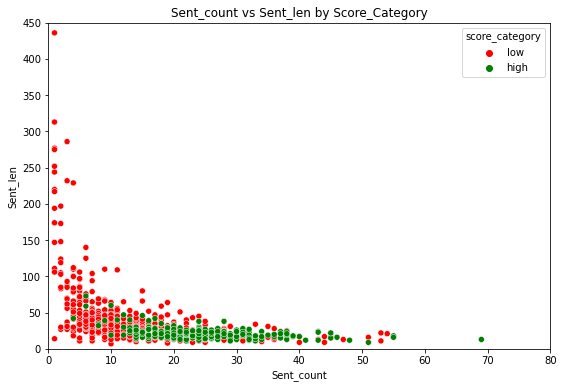

In [10]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='sent_count', y='sent_len', hue='score_category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='sent_count', y='sent_len', hue='score_category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 80)
plt.ylim(0, 450)

# Calculate and plot the average word_count for low and high scored essays
low_sent_count_mean = round(low_df['sent_count'].mean())
high_sent_count_mean = round(high_df['sent_count'].mean())
print('Average number of sentences used by students in low-scored essays', low_sent_count_mean)
print('Average number of sentences used by students in high-scored essays',high_sent_count_mean)

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())
print('Average sentence length written by students in low-scored essays', low_sent_len_mean)
print('Average sentence length written by students in high-scored essays',high_sent_len_mean)

# Add plot titles and labels
plt.title('Sent_count vs Sent_len by Score_Category')
plt.xlabel('Sent_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

This insight is interesting and signifies how students with high scored essays used more short sentences, where as students who got low score wrote lengthy sentences but number of sentences were very less.

We saw in the data visualization module how some students exceptionally wrote lengthy sentences, however writing long sentences do not gurantee a high score.



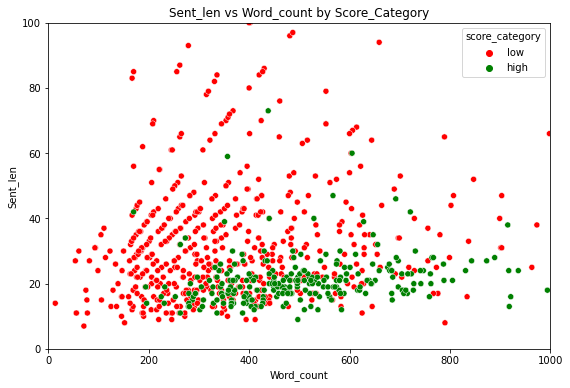

In [11]:
low_palette = {'low': 'red'}
high_palette = {'high': 'green'}

# Scatter plot for sent_len vs word_count by Score_Category
fig, ax = plt.subplots(figsize=(9, 6))
sns.scatterplot(x='word_count', y='sent_len', hue='score_category', palette=low_palette, data=low_df, ax=ax)

# Scatter plot for sent_len vs word_count by Score_Category for high scored essays
sns.scatterplot(x='word_count', y='sent_len', hue='score_category', palette=high_palette, data=high_df, ax=ax)

# Set x and y limits for the plot
plt.xlim(0, 1000)
plt.ylim(0, 100)

# Calculate and plot the average word_count for low and high scored essays
low_word_count_mean = round(low_df['word_count'].mean())
high_word_count_mean = round(high_df['word_count'].mean())

# Calculate and plot the average sent_len for low and high scored essays
low_sent_len_mean = round(low_df['sent_len'].mean())
high_sent_len_mean = round(high_df['sent_len'].mean())

# Add plot titles and labels
plt.title('Sent_len vs Word_count by Score_Category')
plt.xlabel('Word_count')
plt.ylabel('Sent_len')

# Show the plot
plt.show()

#Try histogram

This visualization makes sense as students with low scored essays used more words to make their sentences lengthy.

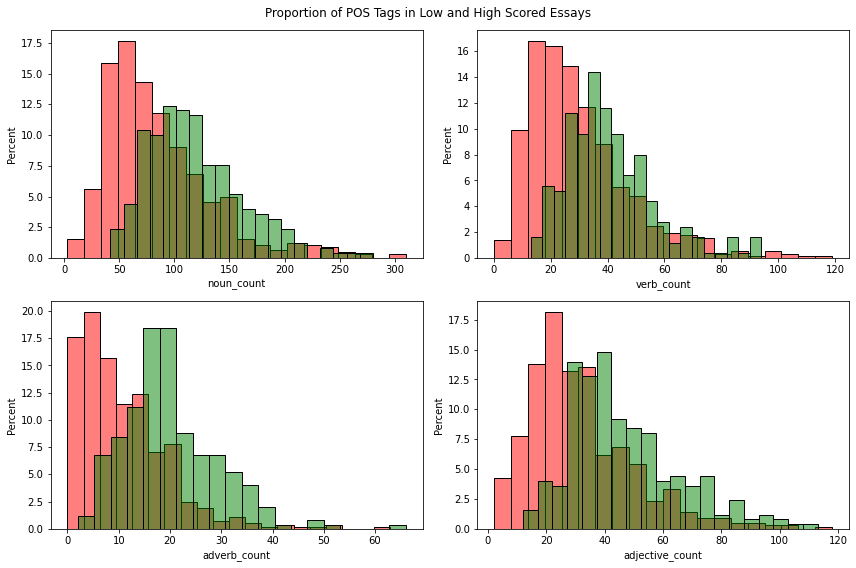

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x='noun_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 0])
sns.histplot(x='noun_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 0])

sns.histplot(x='verb_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[0, 1])
sns.histplot(x='verb_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[0, 1])

sns.histplot(x='adverb_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 0])
sns.histplot(x='adverb_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 0])

sns.histplot(x='adjective_count', data=low_df, bins=20, stat= 'percent', color='red', alpha=0.5, label='Low Scored Essays', ax=axs[1, 1])
sns.histplot(x='adjective_count', data=high_df, bins=20, stat= 'percent', color='green', alpha=0.5, label='High Scored Essays', ax=axs[1, 1])

plt.suptitle('Proportion of POS Tags in Low and High Scored Essays')
plt.tight_layout()

plt.show()

Another good insight is that how students used more nouns, adverbs, adjectives and verbs in their essays to get a high score.

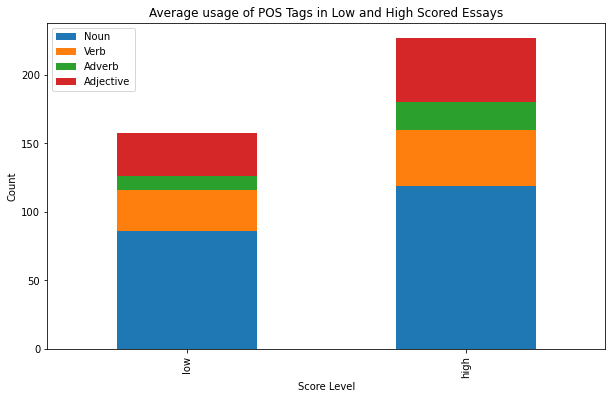

In [13]:
# create a dataframe with aggregated counts for each POS tag and score level
pos_counts = pd.concat([low_df.mean(), high_df.mean()], axis=1)
pos_counts.columns = ['low', 'high']
pos_counts = pos_counts[['low', 'high']].T[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']]

# plot the stacked bar chart
pos_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Score Level')
plt.ylabel('Count')
plt.title('Average usage of POS Tags in Low and High Scored Essays')
plt.legend(['Noun', 'Verb', 'Adverb', 'Adjective'])
plt.show()

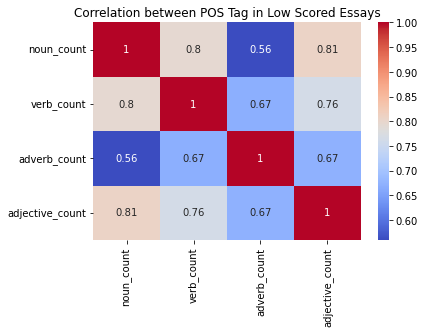

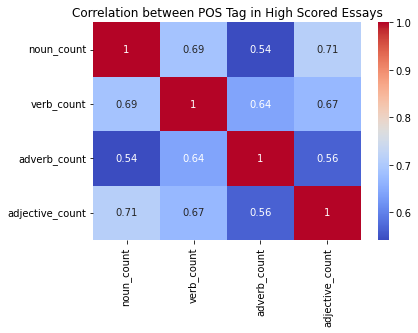

In [14]:
# Calculate the correlation matrix for the four columns in low_df
low_corr = low_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(low_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag in Low Scored Essays')

# Display the chart
plt.show()

# Calculate the correlation matrix for the four columns in high_df
high_corr = high_df[['noun_count', 'verb_count', 'adverb_count', 'adjective_count']].corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(high_corr, annot=True, cmap='coolwarm')

# Set the chart title
plt.title('Correlation between POS Tag in High Scored Essays')

# Display the chart
plt.show()

Above correlation is an attempt to understand if there are some hidden inter-relationships in the usage of POS tags in essays. 

For example, in the low-scored essays correlation heat-map, we can see how students have mostly used nouns with verbs and adjectives with a high correlation, here we can give personalized recommendations to the students to use more adverbs with nouns to increase the score of essay.